# UK COVID-19 Charts

Do vaccines work? Scroll to the bottom for the charts

Infection and Death rate data here:
https://www.worldometers.info/coronavirus/country/uk/

Vaccination rate data here:
https://coronavirus.data.gov.uk/details/vaccinations


In [221]:
%matplotlib inline
import arrow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from itertools import cycle
import matplotlib
import csv
from matplotlib.ticker import PercentFormatter
import json

from matplotlib.ticker import EngFormatter

# Set default plot size
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 16

LAST_DAY = '2021-05-17'

In [222]:
def load_dataframes():
    vax_rows = {}
    with open("./data/uk_vax_rate_2021-05-19.csv") as vax_rate_file:
        reader = csv.DictReader(vax_rate_file)
        for row in reader:
            # print(row)
            if row['newPeopleVaccinatedFirstDoseByPublishDate'] == '':
                daily_new_vax = 0
            else:
                daily_new_vax = int(row['newPeopleVaccinatedFirstDoseByPublishDate'])
            if row['cumPeopleVaccinatedFirstDoseByPublishDate'] == '':
                total_vax = 0
            else:
                total_vax = int(row['cumPeopleVaccinatedFirstDoseByPublishDate'])
            vax_row = {
                "date": arrow.get(row['date']).datetime,
                "daily_new_vax":daily_new_vax,
                "total_vax": total_vax,
            }
            vax_rows[row['date']] = vax_row
    worldometers_df = pd.read_json('./data/uk_data_2021-05-18.json')
    worldometers_df['date'] = pd.to_datetime(worldometers_df['date'], utc = True)
    worldometers_df = worldometers_df[worldometers_df['date'] <= LAST_DAY]
    worldometers_df = worldometers_df.set_index('date', drop=True)

    vax_rate_df = pd.DataFrame(vax_rows).transpose()
    vax_rate_df['date'] = pd.to_datetime(vax_rate_df['date'], utc = True)
    vax_rate_df = vax_rate_df[vax_rate_df['date'] <= LAST_DAY]
    vax_rate_df = vax_rate_df.set_index('date', drop=True)
    return worldometers_df, vax_rate_df

worldometers_df, vax_rate_df = load_dataframes()
df = worldometers_df.join(vax_rate_df, on='date',how='left')
df['date'] = df.index

<Figure size 1440x1440 with 0 Axes>

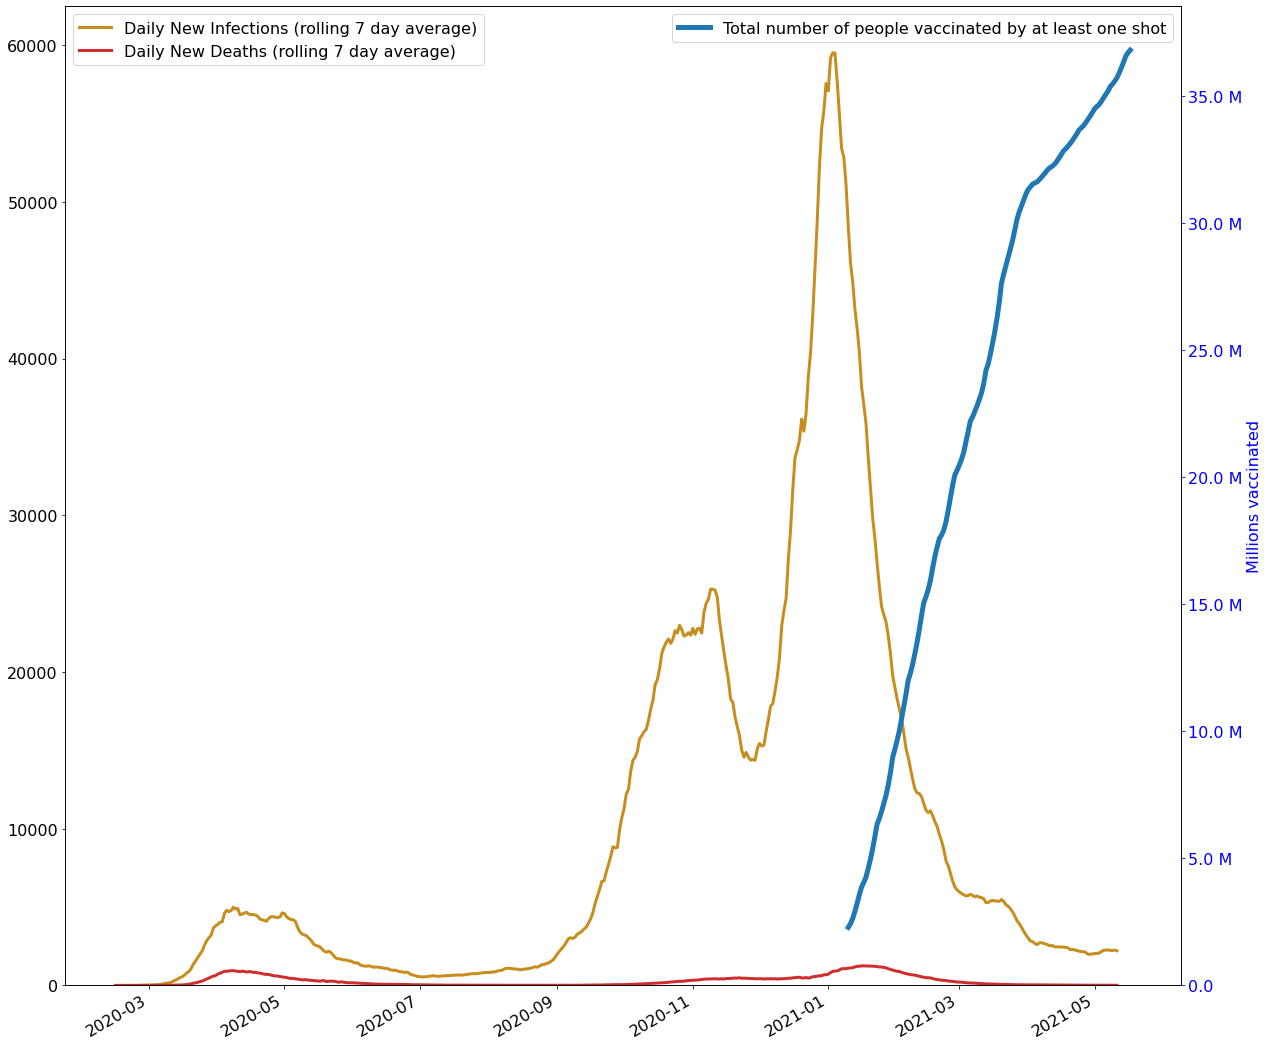

In [223]:

plt.clf()
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(df['date'], df['daily_new_cases'].rolling(7).mean() , label='Daily New Infections (rolling 7 day average)', linestyle='-', linewidth=3, color='#c78d1d')
ax.plot(df['date'], df['daily_new_deaths'].rolling(7).mean() , label='Daily New Deaths (rolling 7 day average)', linestyle='-', linewidth=3, color='#ce2e2e')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['date'], df['total_vax'], label='Total number of people vaccinated by at least one shot', linestyle='-', linewidth=5)
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Millions vaccinated')
ax2.yaxis.label.set_color('blue')
ax2.legend(loc='upper right')

formatter1 = EngFormatter(places=1, sep=" ")  # U+2009
ax2.yaxis.set_major_formatter(formatter1)
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()


<Figure size 1440x1440 with 0 Axes>

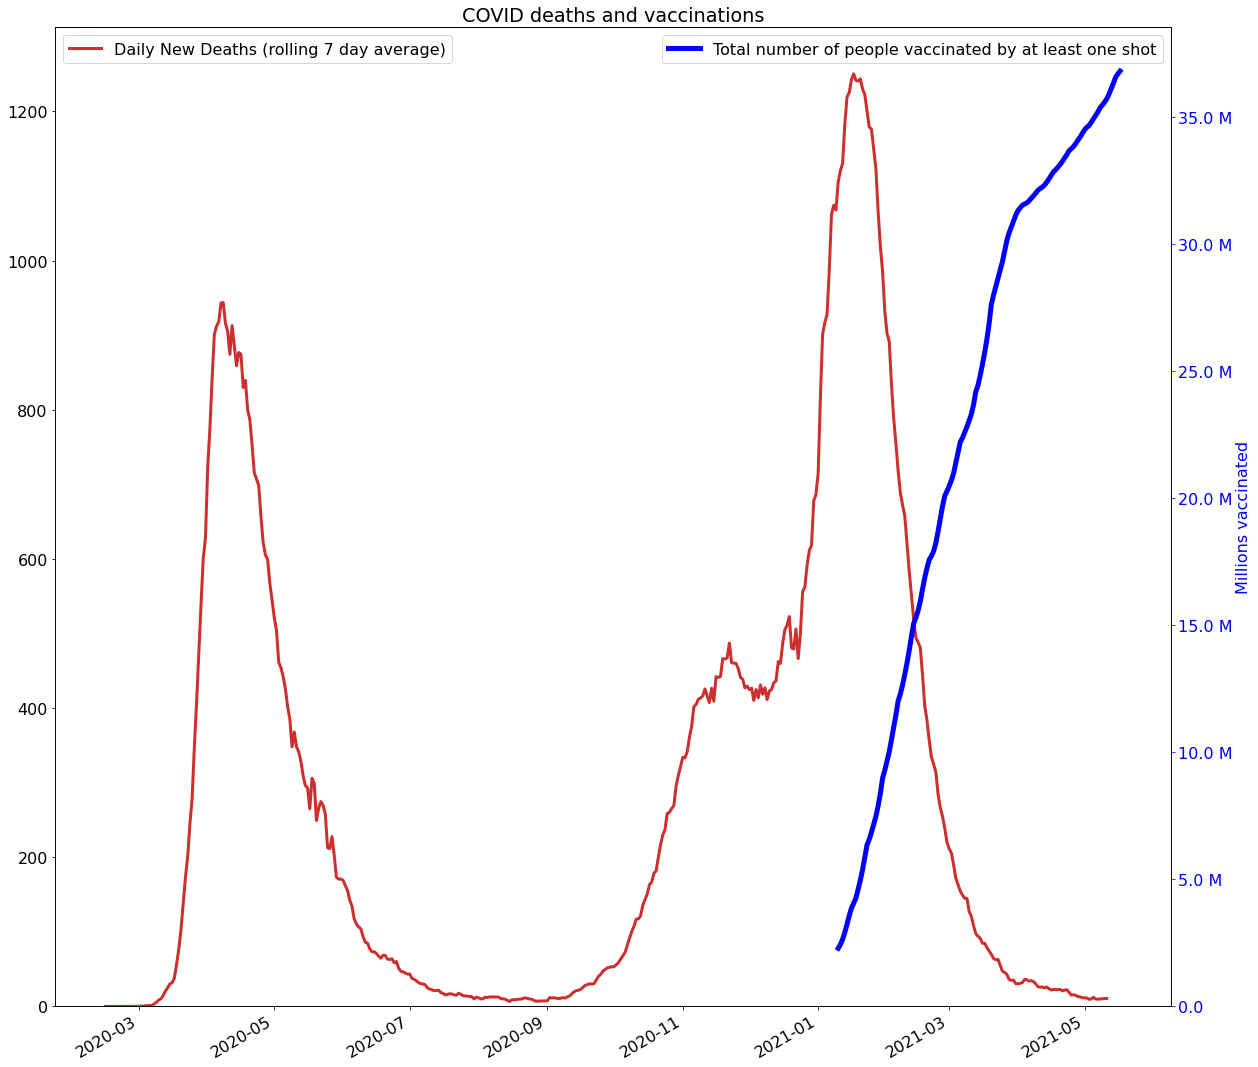

<Figure size 1440x1440 with 0 Axes>

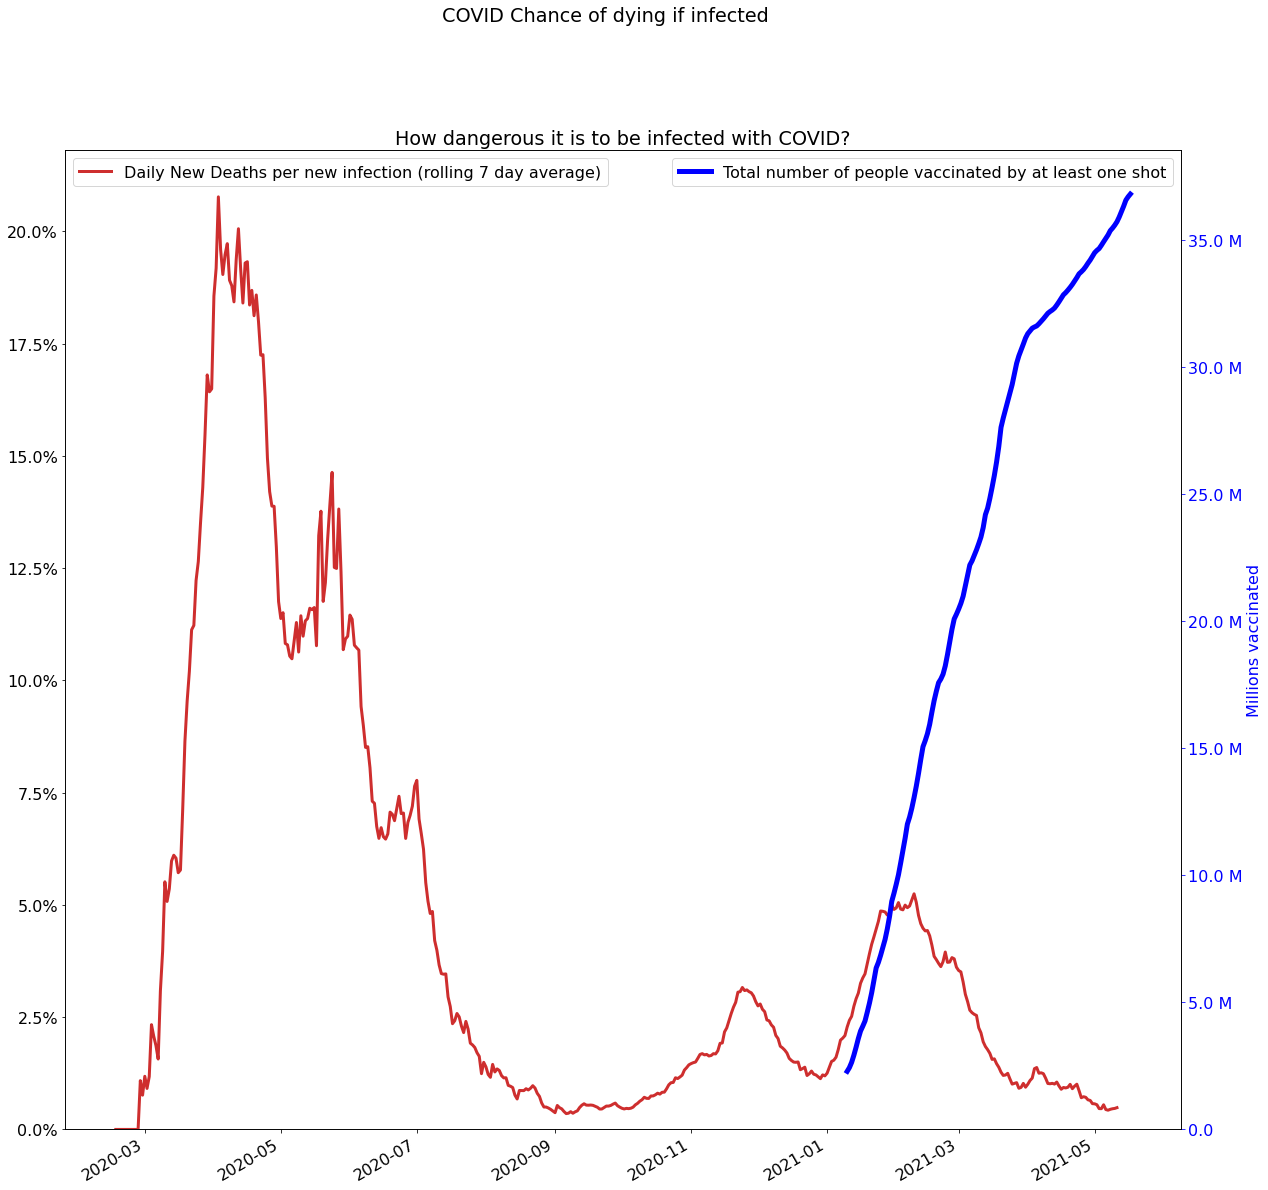

In [224]:
plt.clf()
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title("COVID deaths and vaccinations")
ax.plot(df['date'], df['daily_new_deaths'].rolling(7).mean() , label='Daily New Deaths (rolling 7 day average)', linestyle='-', linewidth=3, color='#ce2e2e')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['date'], df['total_vax'], label='Total number of people vaccinated by at least one shot', linestyle='-', linewidth=5, color='blue')
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Millions vaccinated')
ax2.yaxis.label.set_color('blue')
ax2.legend(loc='upper right')

formatter1 = EngFormatter(places=1, sep=" ")  # U+2009
ax2.yaxis.set_major_formatter(formatter1)
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()


plt.clf()
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title("How dangerous it is to be infected with COVID?")
plt.suptitle("COVID Chance of dying if infected")

ax.plot(df['date'], df['daily_new_deaths'].rolling(7).mean() /df['daily_new_cases'].rolling(7).mean() , label='Daily New Deaths per new infection (rolling 7 day average)', linestyle='-', linewidth=3, color='#ce2e2e')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['date'], df['total_vax'], label='Total number of people vaccinated by at least one shot', linestyle='-', linewidth=5, color='blue')
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Millions vaccinated')
ax2.yaxis.label.set_color('blue')
ax2.legend(loc='upper right')

formatter1 = EngFormatter(places=1, sep=" ")  # U+2009
ax2.yaxis.set_major_formatter(formatter1)
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()
